In [ ]:
# Exploratory Data analysis for Predictive Maintenance
# This notebook performs initial analysis on the predictive maintenance dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/predictive_maintenance.csv")

# Display first few rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
# Basic info about the dataset
df.info()

# Statistical summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
# Count missing values
missing_values = df.isnull().sum()
print(missing_values)


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


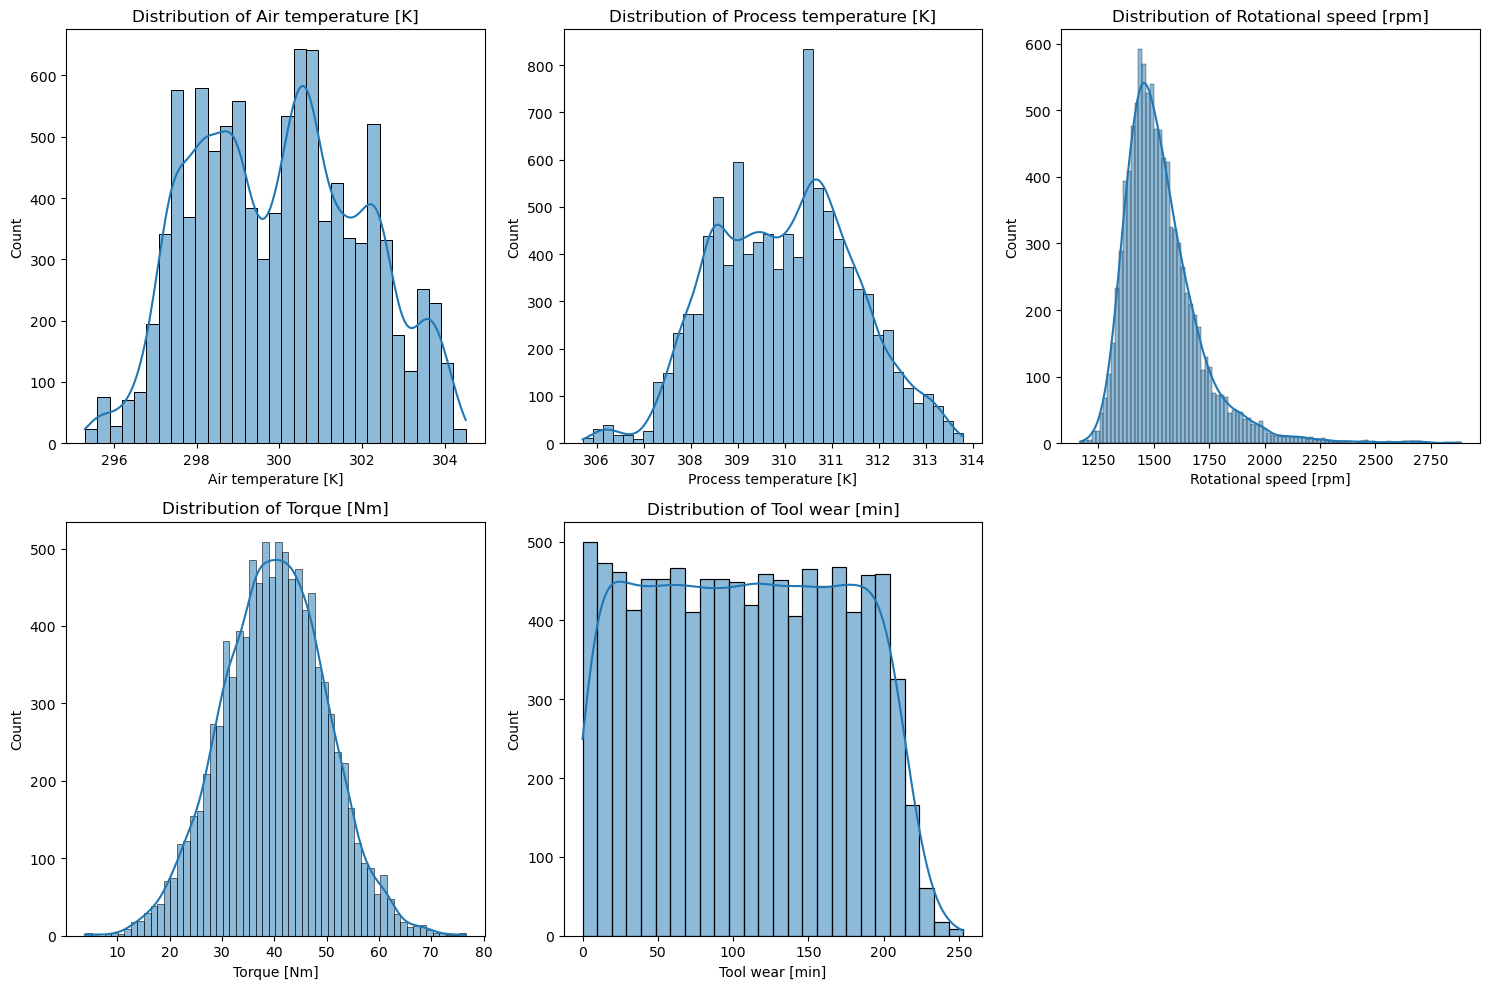

In [13]:
# Plot histograms to see the distributions for numerical columns
num_columns = ['Air temperature [K]', 'Process temperature [K]', 
               'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


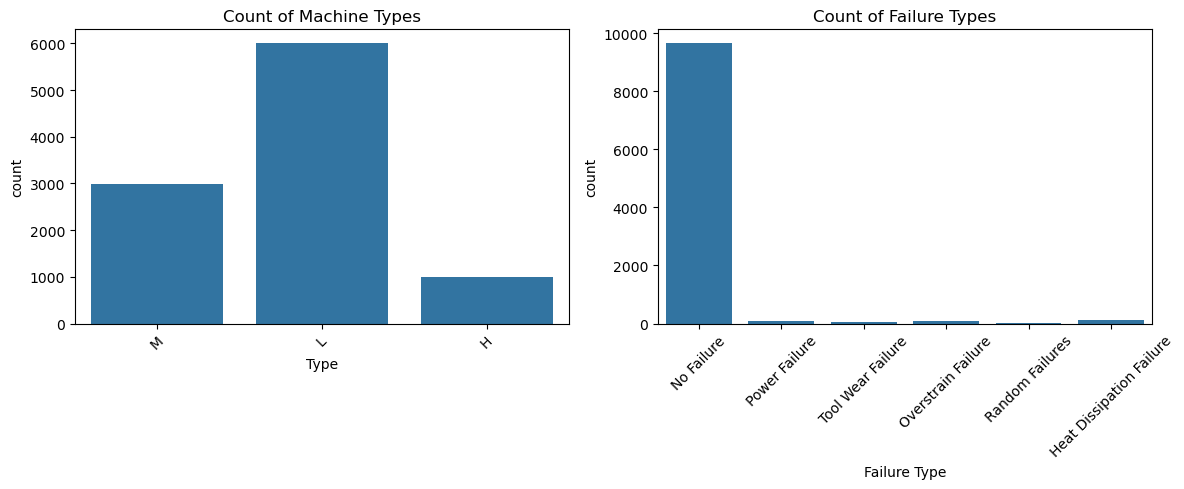

In [12]:
# Plot distribution for categorical columns
# Count plots for categorical columns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="Type", data=df)
plt.title("Count of Machine Types")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x="Failure Type", data=df)
plt.title("Count of Failure Types")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


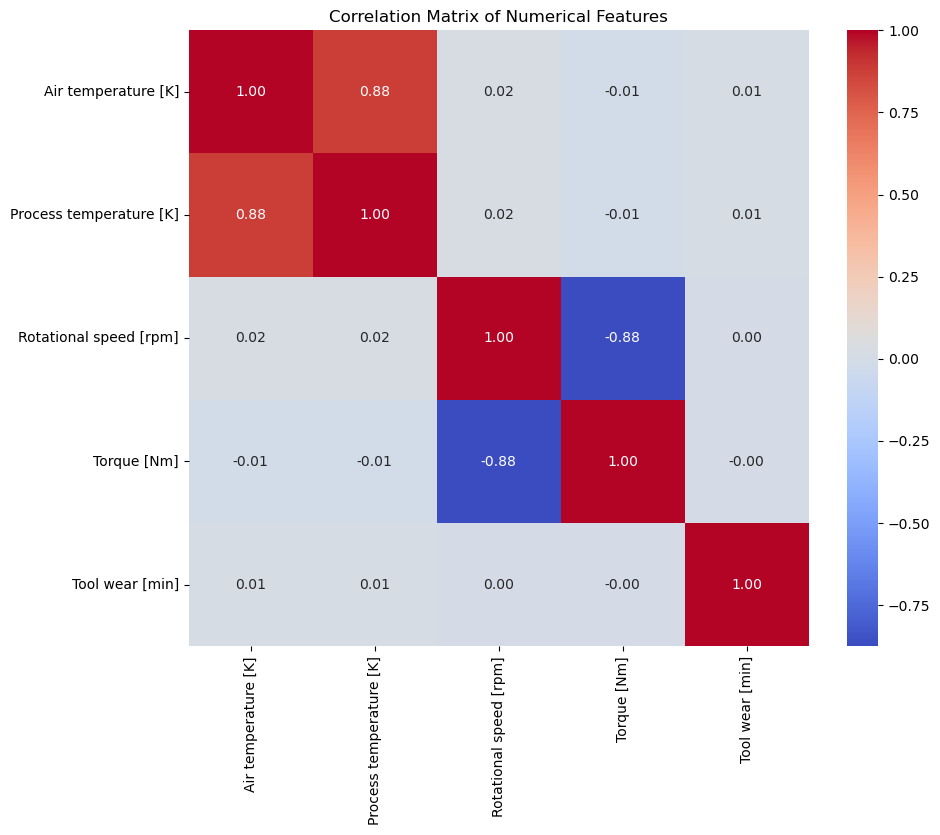

In [14]:
# Visualize correlation matrix for numerical features
# Calculate correlation matrix
corr_matrix = df[num_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


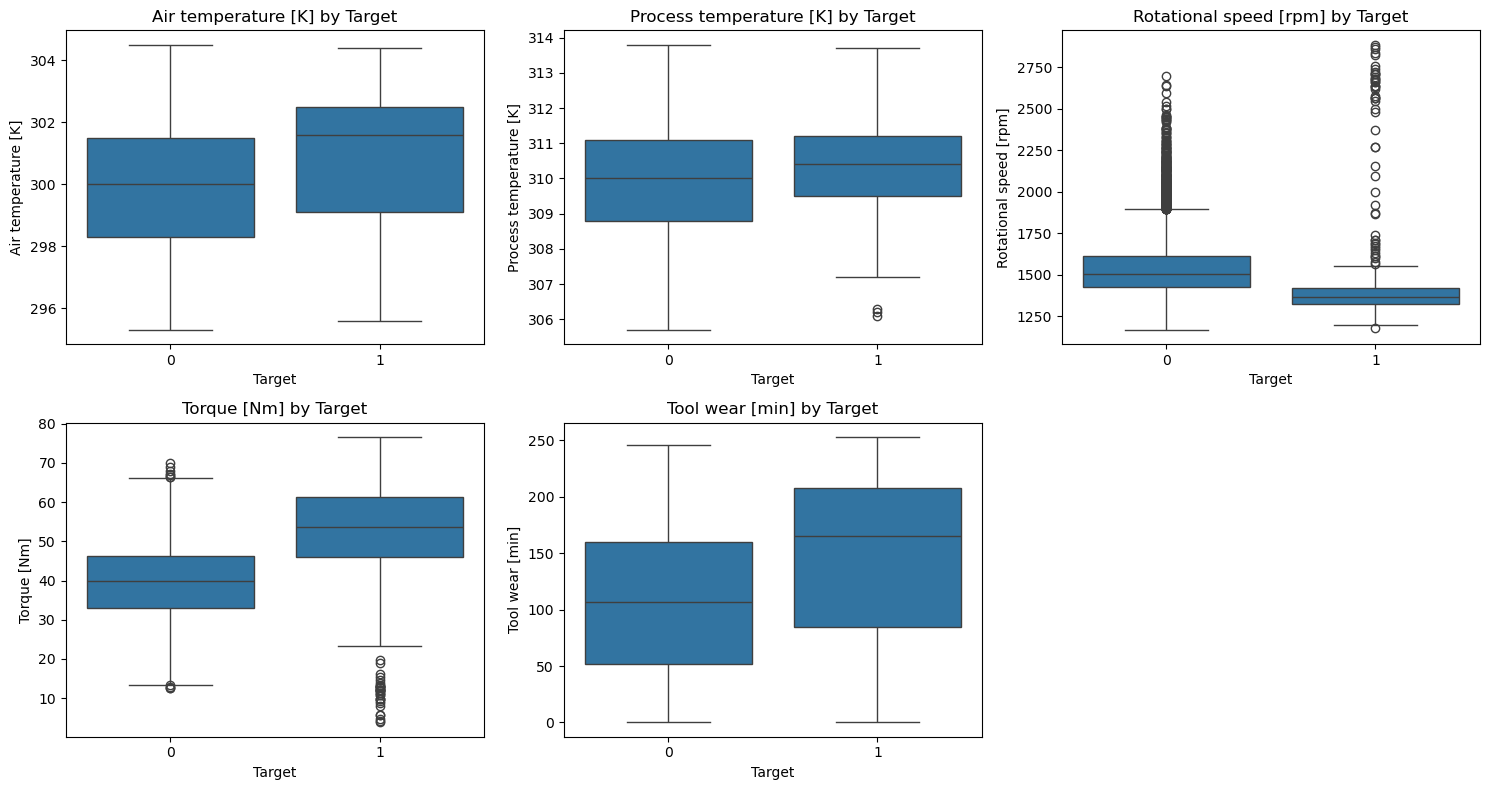

In [15]:
# Boxplot of numerical features split by Target
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="Target", y=col, data=df)
    plt.title(f"{col} by Target")
plt.tight_layout()
plt.show()


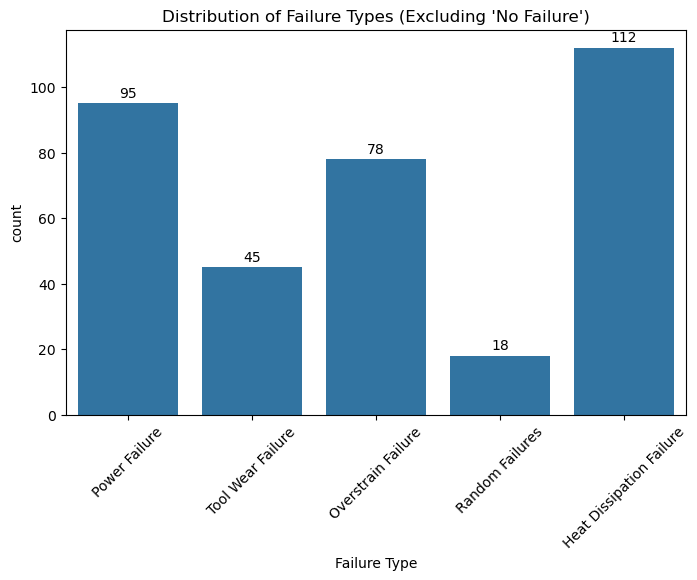

In [18]:
# Distribution of failure types
# Create a new DataFrame excluding rows where Failure Type is "No Failure"
failure_df = df[df["Failure Type"] != "No Failure"]

plt.figure(figsize=(8,5))
ax = sns.countplot(x="Failure Type", data=failure_df)
plt.title("Distribution of Failure Types (Excluding 'No Failure')")
plt.xticks(rotation=45)

# Annotate each bar with the count
for p in ax.patches:
    count = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., count + 1, int(count), 
            ha="center", va="bottom")

plt.show()


In [ ]:
# Summary of EDA Findings
'''
Numerical Features:
1. Most features show roughly normal distributions
2. Tool Wear spans a wide range and is probably a strong predictor of failure

Categorical Variables:
1. Machine Type distribution is dominated by Type L, followed by M and H.
2. Significant class imbalance as failure type is dominated by "No Failure"

Correlation Insights:
1. Air vs Process temp are strongly correlated (~0.88)
2. Rotational Speed vs Torque are negatively correlated (~-0.88)
3. Tool Wear shows minimimal correlation with other features, suggesting it might provide unique information

Failure vs No failure (Boxplots)
1. Rotation Speed, Torque and Tool wear differ noticeable between failure and no-failure cases.
2. Higher tool wear often corresponds to failures

'''
